# REALTY RATE
## Real Estate Price Prediction Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Here, We will convert our csv dataset to python dataframe.
df = pd.read_csv('USA_Data.csv')

In [3]:
# Printing first five rows of the dataframe.
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [4]:
# Printing Number of Rows and Columns in our dataframe.
df.shape

(904966, 10)

In [5]:
# Printing Brief summary of our dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          904966 non-null  object 
 1   bed             775126 non-null  float64
 2   bath            791082 non-null  float64
 3   acre_lot        638324 non-null  float64
 4   city            904894 non-null  object 
 5   state           904966 non-null  object 
 6   zip_code        904762 non-null  float64
 7   house_size      612080 non-null  float64
 8   prev_sold_date  445865 non-null  object 
 9   price           904895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 69.0+ MB


In [6]:
# Finding Number of Unique Values in each column. 
df.nunique()

status               2
bed                 43
bath                39
acre_lot          3257
city              2487
state               18
zip_code          3140
house_size        6344
prev_sold_date    9870
price             7137
dtype: int64

# Data pre-processing

<Axes: >

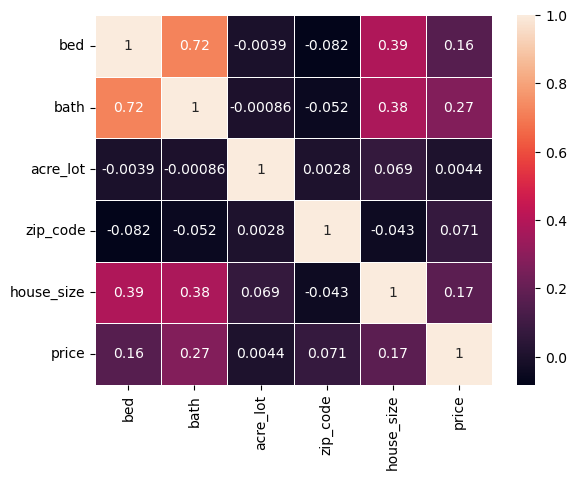

In [7]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)

In [8]:
# Dropping Unwanted Columns.
data = df.drop(columns=['status','acre_lot', 'zip_code', 'prev_sold_date',  'city'])
data

,bed,bath,state,house_size,price
0,3.0,2.0,Puerto Rico,920.0,105000.0
1,4.0,2.0,Puerto Rico,1527.0,80000.0
2,2.0,1.0,Puerto Rico,748.0,67000.0
3,4.0,2.0,Puerto Rico,1800.0,145000.0
4,6.0,2.0,Puerto Rico,NaN,65000.0
...,...,...,...,...,...
904961,2.0,2.0,New York,NaN,359000.0
904962,2.0,2.0,New York,1200.0,299000.0
904963,NaN,1.0,New York,NaN,120000.0
904964,3.0,2.0,New York,NaN,449000.0


In [9]:
# Printing a detailed summary of our dataframe.
data.describe()

,bed,bath,house_size,price
count,775126.000000,791082.000000,6.120800e+05,9.048950e+05
mean,3.332190,2.484236,2.138437e+03,8.774382e+05
std,2.065312,1.931622,3.046600e+03,2.457698e+06
min,1.000000,1.000000,1.000000e+02,0.000000e+00
25%,2.000000,2.000000,1.132000e+03,2.685000e+05
50%,3.000000,2.000000,1.650000e+03,4.750000e+05
75%,4.000000,3.000000,2.495000e+03,8.300000e+05
max,123.000000,198.000000,1.450112e+06,8.750000e+08


In [10]:
# Finding Number of null Values in each column. 
data.isnull().sum()

bed           129840
bath          113884
state              0
house_size    292886
price             71
dtype: int64

In [11]:
data = data[~(data.isna().sum(axis=1) >= 2)]
# Finding Number of null Values in each column. 
data.isnull().sum()

bed            12362
bath            4598
state              0
house_size    180650
price              0
dtype: int64

In [12]:
data = data.drop(data[data['bed'].isnull()].index, axis=0)
data = data.drop(data[data['bath'].isnull()].index, axis=0)
data = data.drop(data[data['house_size'].isnull()].index, axis=0)


In [13]:
# Finding Number of null Values in each column. 
data.isnull().sum()

bed           0
bath          0
state         0
house_size    0
price         0
dtype: int64

In [14]:
state_count=data['state'].value_counts()
state_count

Massachusetts     148167
New York          113375
New Jersey         98533
Connecticut        78210
New Hampshire      32171
Rhode Island       28144
Vermont            27998
Maine              24524
Puerto Rico        20946
Pennsylvania       14813
Delaware            1883
Virgin Islands       501
Georgia               48
Wyoming                3
West Virginia          3
Name: state, dtype: int64

In [15]:
data=data.drop(data[data['state'].map(state_count) < 50].index)
data['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Jersey', 'New York', 'New Hampshire', 'Vermont',
       'Rhode Island', 'Maine', 'Pennsylvania', 'Delaware'], dtype=object)

<Axes: >

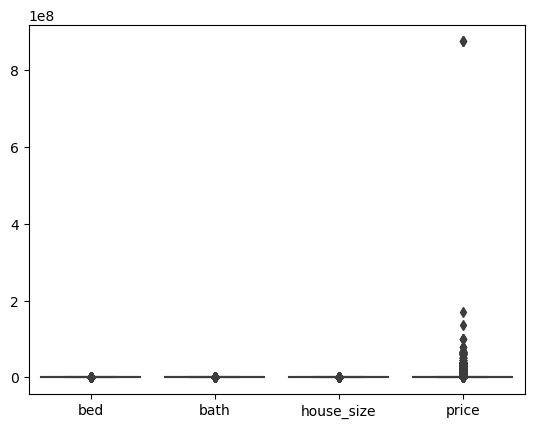

In [16]:
sns.boxplot(data=data)

In [17]:
import numpy as np
import pandas as pd

# Calculate the 25th and 75th percentiles
q25, q75 = np.percentile(data["price"], [25, 75])

# Calculate the IQR
iqr = q75 - q25

# Define the limit for outliers (e.g., using 1.5 times the IQR)
upper_limit = q75 + 1.5 * iqr
lower_limit = q25 - 1.5 * iqr

# Calculate the percentage of data points that are outliers
percentage_outliers = len(df[df["price"] > upper_limit]) / len(df.index) * 100

# Remove rows with "price" values exceeding the limit
data = data[data["price"] < upper_limit]
data = data[data["price"] > lower_limit]

# Print the percentage of data points that are outliers
print("Percentage of outliers:", percentage_outliers)
upper_limit

Percentage of outliers: 9.22233542475629


1762650.0

<Axes: xlabel='price'>

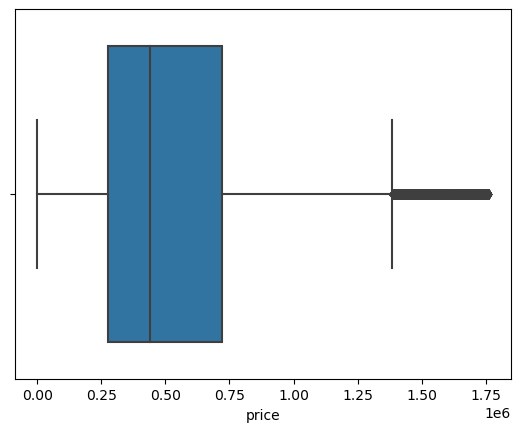

In [18]:
sns.boxplot(data=data, x="price")

<Axes: xlabel='house_size'>

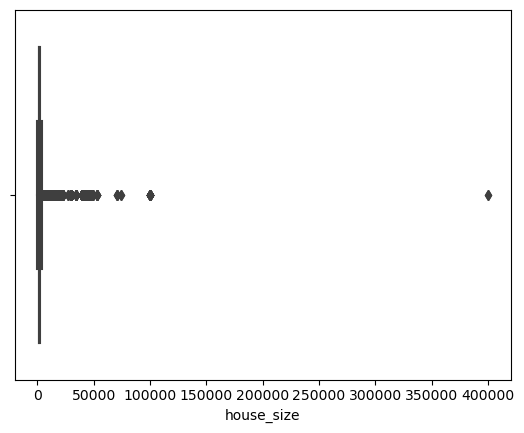

In [19]:
sns.boxplot(data=data, x="house_size")

In [20]:
import numpy as np
import pandas as pd

# Calculate the 25th and 75th percentiles
q25, q75 = np.percentile(data["house_size"], [25, 75])

# Calculate the IQR
iqr = q75 - q25

# Define the limits for outliers (e.g., using 1.5 times the IQR)
upper_limit = q75 + 1.5 * iqr
lower_limit = q25 - 1.5 * iqr

# Calculate the percentage of data points that are outliers
percentage_outliers = len(df[df["house_size"] > upper_limit]) / len(df.index) * 100

# Remove rows with "house_size" values exceeding the limit
data = data[data["house_size"] < upper_limit]
data = data[data["house_size"] > lower_limit]

# Print the percentage of data points that are outliers
print("Percentage of outliers:", percentage_outliers)

Percentage of outliers: 5.083947905225169


<Axes: xlabel='house_size'>

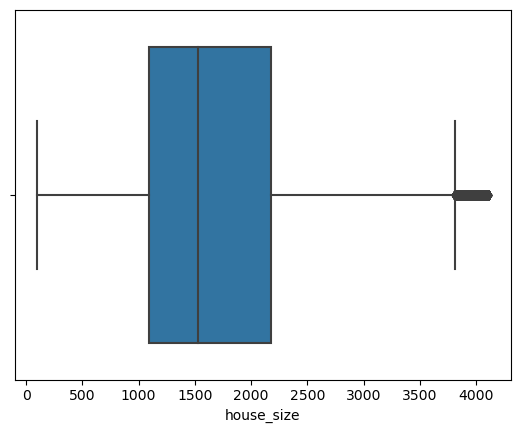

In [21]:
sns.boxplot(data=data, x="house_size")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503108 entries, 0 to 904965
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bed         503108 non-null  float64
 1   bath        503108 non-null  float64
 2   state       503108 non-null  object 
 3   house_size  503108 non-null  float64
 4   price       503108 non-null  float64
dtypes: float64(4), object(1)
memory usage: 23.0+ MB


In [23]:
data.describe()

,bed,bath,house_size,price
count,503108.000000,503108.000000,503108.000000,5.031080e+05
mean,3.071078,2.180601,1700.357508,5.237369e+05
std,1.414759,0.978827,799.271032,3.515647e+05
min,1.000000,1.000000,100.000000,5.000000e+02
25%,2.000000,1.000000,1088.000000,2.690000e+05
50%,3.000000,2.000000,1525.000000,4.250000e+05
75%,4.000000,3.000000,2179.000000,6.990000e+05
max,21.000000,12.000000,4109.000000,1.760000e+06


# Exploratory Data Analysis

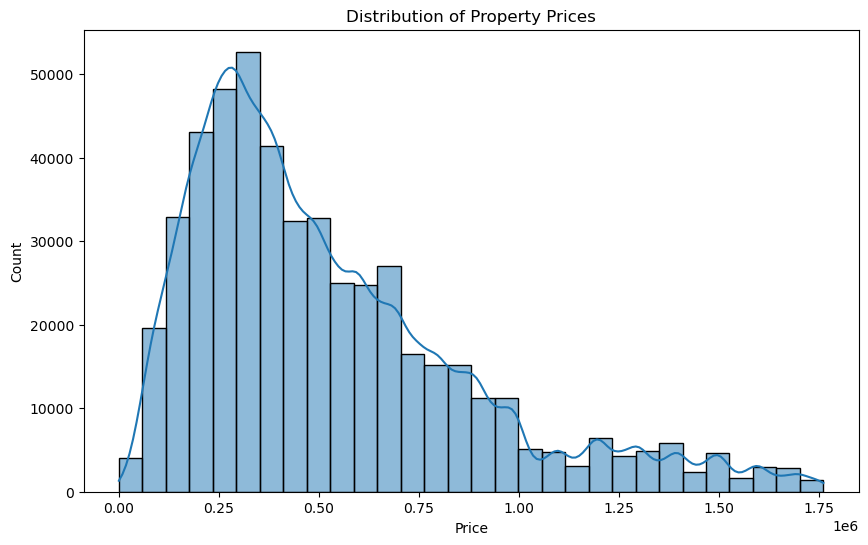

In [24]:
# Distribution of Price
plt.figure(figsize=(10,6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

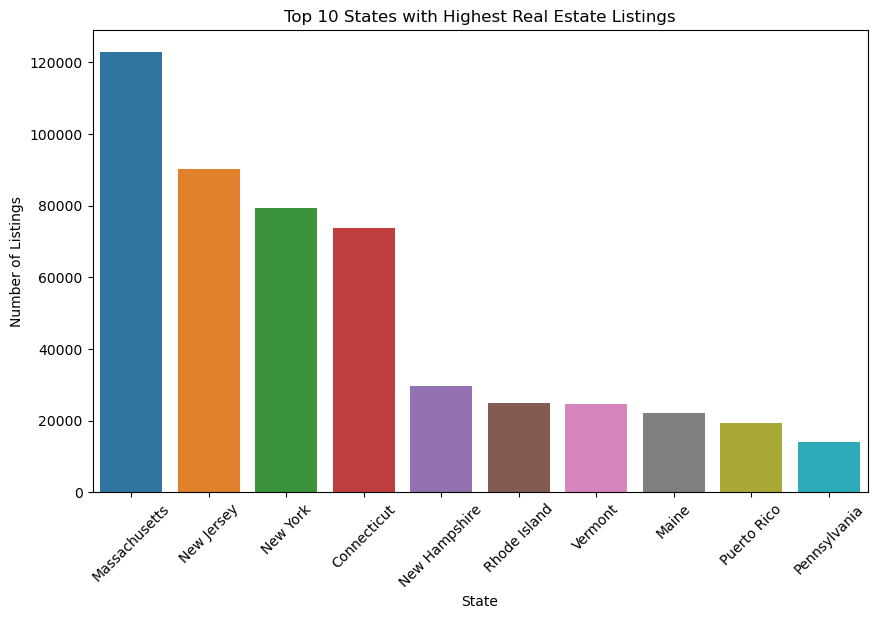

In [25]:
top_states = data["state"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 10 States with Highest Real Estate Listings')
plt.xlabel('State')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

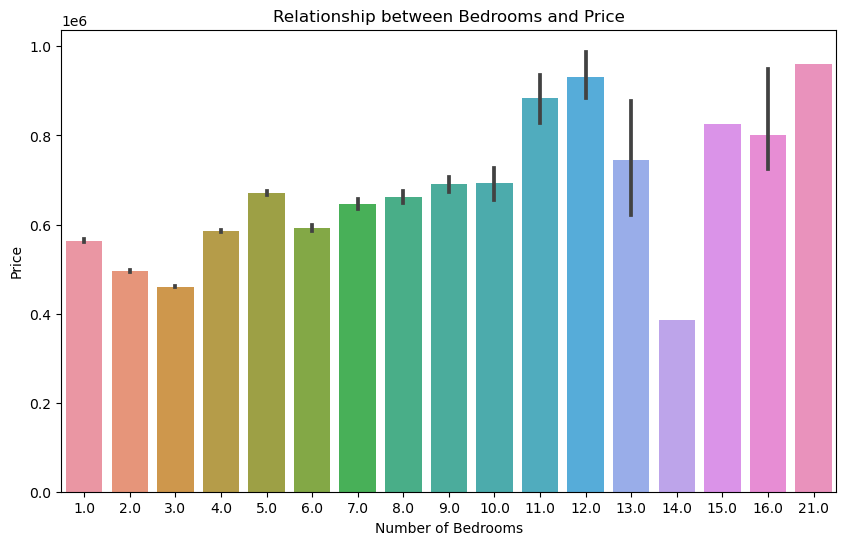

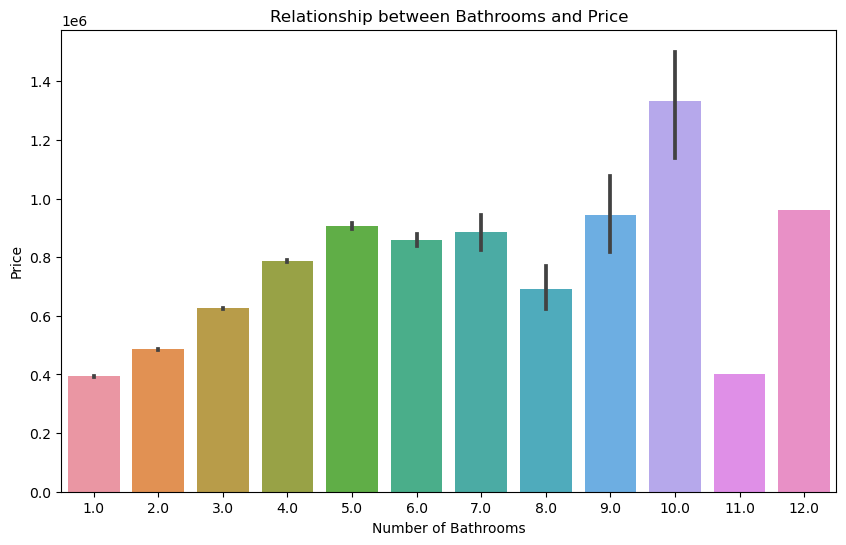

In [26]:
# Number of rooms and price 
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='bed', y='price')
plt.title('Relationship between Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Number of bedrooms and price
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='bath', y='price')
plt.title('Relationship between Bathrooms and Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='price', ylabel='state'>

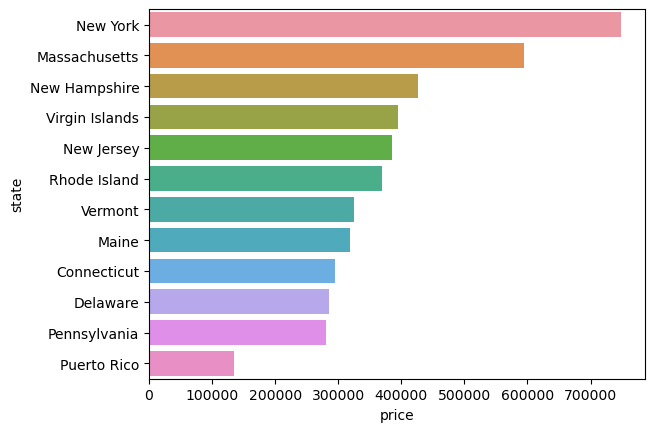

In [27]:
df1 = data.groupby('state', as_index=False)['price'].median().sort_values('price', ascending=False)
sns.barplot(data = df1, x = 'price', y = 'state')

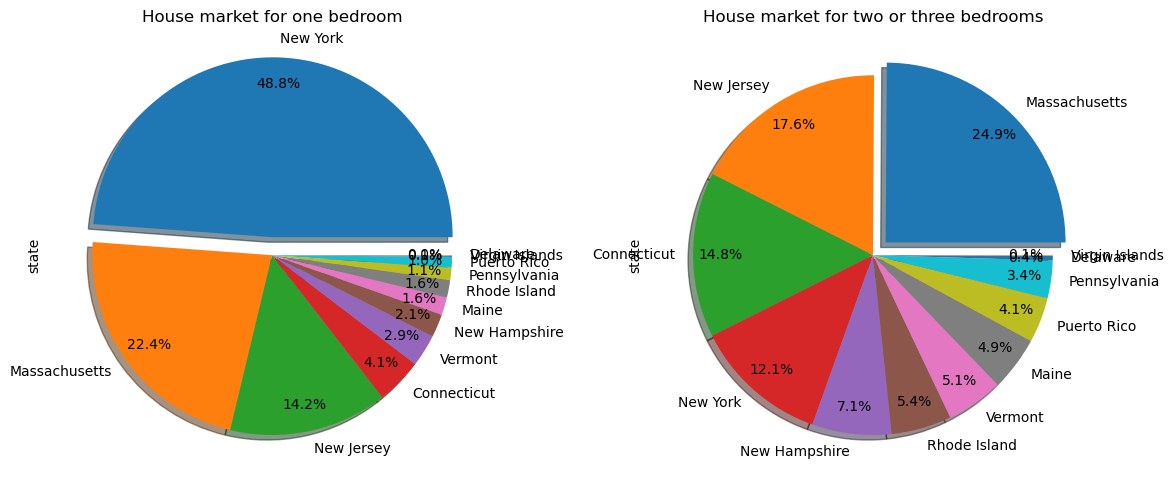

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for one-bedroom houses
data_1bed = data[data['bed'] == 1]['state'].value_counts()
explode_1bed = [0.1 if count == data_1bed.max() else 0 for count in data_1bed]
data_1bed.plot.pie(ax=ax[0,], title='House market for one bedroom', autopct='%1.1f%%', pctdistance=0.85, explode=explode_1bed, shadow=True)

# Plot for two or three-bedroom houses
data_2or3bed = data[data['bed'].isin([2, 3])]['state'].value_counts()
explode_2or3bed = [0.1 if count == data_2or3bed.max() else 0 for count in data_2or3bed]
data_2or3bed.plot.pie(ax=ax[1], title='House market for two or three bedrooms', autopct='%1.1f%%', pctdistance=0.85, explode=explode_2or3bed, shadow=True)

plt.tight_layout()
plt.show()


In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['state_numeric'] = label_encoder.fit_transform(data['state'])
data = data.drop("state", axis=1)
data

,bed,bath,house_size,price,state_numeric
0,3.0,2.0,920.0,105000.0,8
1,4.0,2.0,1527.0,80000.0,8
2,2.0,1.0,748.0,67000.0,8
3,4.0,2.0,1800.0,145000.0,8
5,4.0,3.0,2520.0,179000.0,8
...,...,...,...,...,...
904958,1.0,1.0,700.0,245000.0,6
904959,1.0,1.0,720.0,265000.0,6
904960,2.0,2.0,1200.0,399000.0,6
904962,2.0,2.0,1200.0,299000.0,6


In [30]:
numeric_to_state = {label: state for label, state in enumerate(label_encoder.classes_)}
# Print the mapping
print(numeric_to_state)

{0: 'Connecticut', 1: 'Delaware', 2: 'Maine', 3: 'Massachusetts', 4: 'New Hampshire', 5: 'New Jersey', 6: 'New York', 7: 'Pennsylvania', 8: 'Puerto Rico', 9: 'Rhode Island', 10: 'Vermont', 11: 'Virgin Islands'}


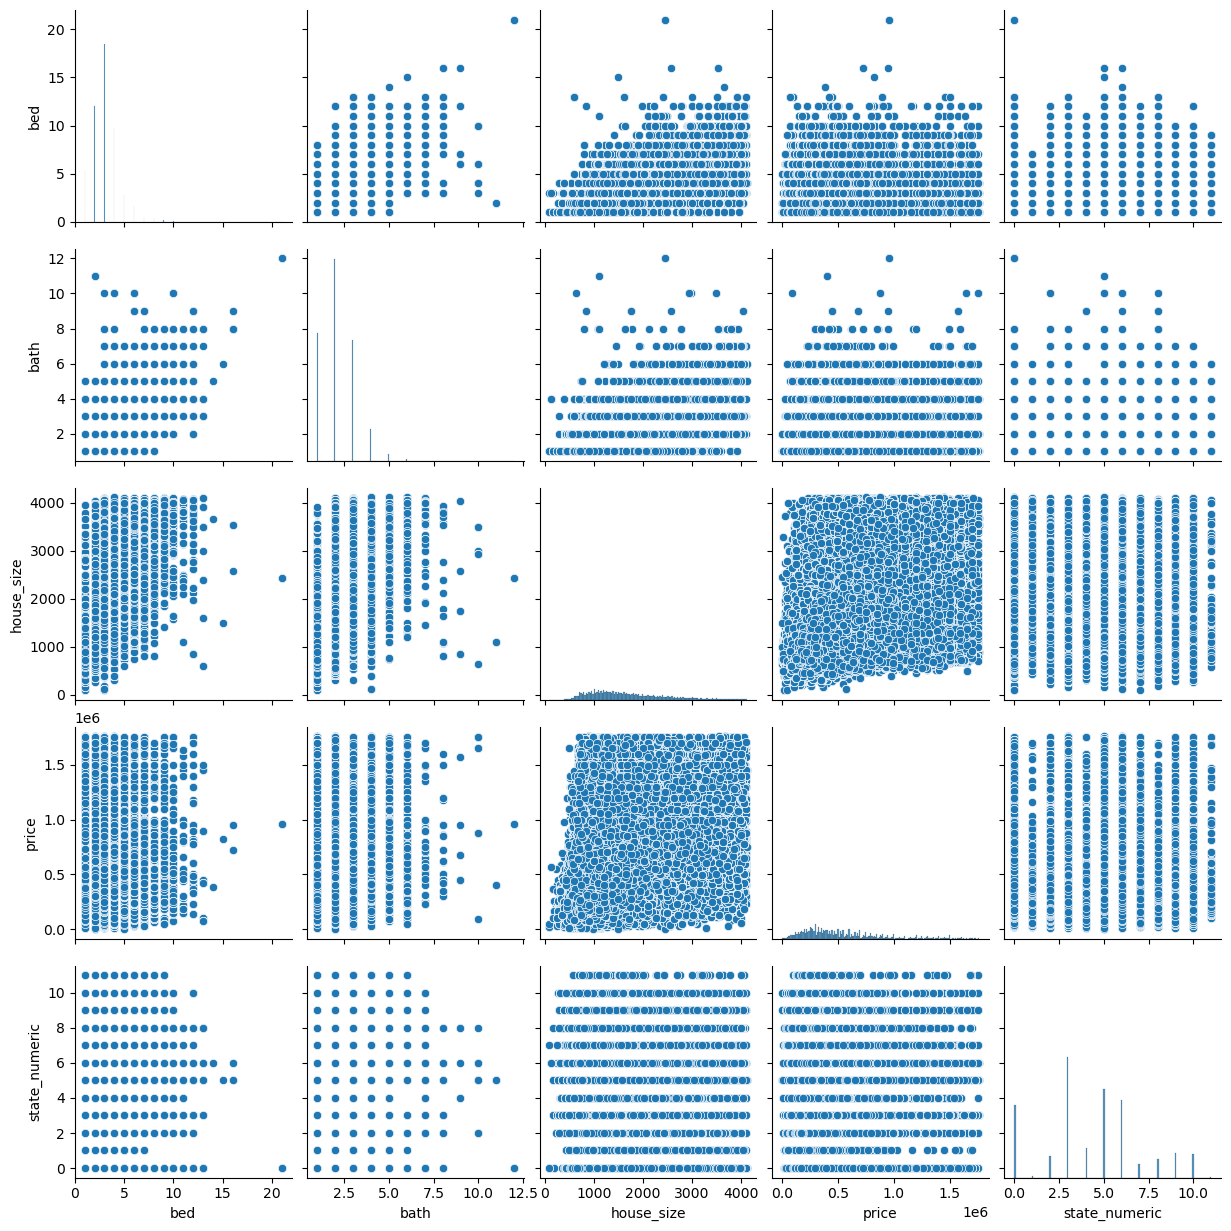

In [31]:
sns.pairplot(data)

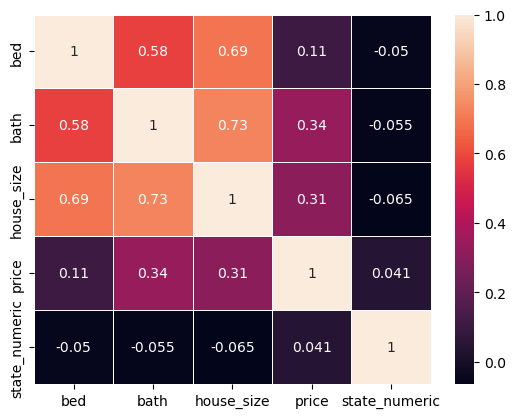

In [32]:
sns.heatmap(data.corr(), annot=True, linewidths=0.5);

In [33]:
data.describe()

,bed,bath,house_size,price,state_numeric
count,503108.000000,503108.000000,503108.000000,5.031080e+05,503108.000000
mean,3.071078,2.180601,1700.357508,5.237369e+05,4.348895
std,1.414759,0.978827,799.271032,3.515647e+05,2.715713
min,1.000000,1.000000,100.000000,5.000000e+02,0.000000
25%,2.000000,1.000000,1088.000000,2.690000e+05,3.000000
50%,3.000000,2.000000,1525.000000,4.250000e+05,5.000000
75%,4.000000,3.000000,2179.000000,6.990000e+05,6.000000
max,21.000000,12.000000,4109.000000,1.760000e+06,11.000000


# Model Training


In [34]:
dependent='price'
independent=data.columns.tolist()
independent.remove(dependent)
x=data[independent].values
y=data[dependent].values

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [37]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()

In [38]:
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [39]:
print(y_pred)
print(y_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

[799000.         560000.         460070.34196568 ... 682791.09144435
 665723.34165239 649000.        ]
[799000. 560000. 259900. ... 825000. 629900. 649000.]


82.76107913148061

In [ ]:
# Mapping of state names to numeric codes
state_mapping = {
    0: 'Connecticut', 1: 'Delaware', 2: 'Maine', 3: 'Massachusetts',
    4: 'New Hampshire', 5: 'New Jersey', 6: 'New York', 7: 'Pennsylvania',
    8: 'Puerto Rico', 9: 'Rhode Island', 10: 'Vermont', 11: 'Virgin Islands'
}

# Function to get input from the user
def get_user_input():
    bed = int(input("Enter the number of bedrooms: "))
    bath = int(input("Enter the number of bathrooms: "))
    house_size = int(input("Enter the house size: "))
    
    # Display the list of states for the user to choose from
    print("States:")
    for code, state_name in state_mapping.items():
        print(f"{code}: {state_name}")
    
    # Get the state input from the user
    state_code = int(input("Enter the code for the state: "))
    
    # Return the user inputs as a list
    return [bed, bath, house_size, state_code]

x_check_data = get_user_input()

# Convert to a 2D array
x_check_2d = np.array(x_check_data).reshape(1,-1)

y_check=random_forest.predict(x_check_2d)
print("Expected price of your house is $",np.round(y_check[0]))
print("THANK YOU!!")


### 